You will find all the results we got on our dataset in the validation report.

### VOTING CLASSIFIERS
Note: Worth mentioning why you decided to chose that set of estimators and you are not testing other combinations of estimators or weights (maybe you tested them in your separate notebooks idk).
- hard voting

Overall i would say better results on our dataset.
- soft voting

Same as with hard voting.
Interesting that you have identical results fo soft (without weigths) and hard voting.

- soft voting - weights

Best from those 3 on our dataset. 
And again on your dataset results are the same for soft-voting with and without weights, maybe you should try different weights

### STACKING
You could try different combinations of estimators (some that performed well in previous stages of modelling). Again better results on our dataset.


In XGBClassifier warning that max_deoth is not used so maybe get not needed?

In [1]:
model=XGBClassifier(random_state=1,
                    learning_rate=0.01, # Szybkość "uczenia" się
                    booster='gblinear', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    max_depth=5 # Maksymalna głębokość drzewa 
                    )
model.fit(X_train, y_train)
y_hat = model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

NameError: name 'XGBClassifier' is not defined

in general, you can try some more options when it comes to bagging and boosting, maybe with reduced amount of columns or different models

#### PARAMETERS TUNING

I don't really understand what you are doing below. Also why mean and sd are nan?

In [2]:
std_test_scores = grid_result.cv_results_['std_test_score']
mean_test_scores = grid_result.cv_results_['mean_test_score']
parameters = grid_result.cv_results_['params']

for mean_test, std_test, params in zip(mean_test_scores, std_test_scores, parameters):
    print('Parameters : {}'.format(params))
    print('Mean test score: {:.8f}'.format(mean_test))
    print('Standard Deviation (test) : {:.8f}'.format(std_test))
    print()

print('Best parameters : {}'.format(grid_result.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_result.best_score_))


NameError: name 'grid_result' is not defined

That's best model on our data

In [ ]:
best_model=grid_result.best_estimator_
best_model

DecisionTreeClassifier(ccp_alpha=0, max_depth=7, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5)

#### GRADIENT BOOSTING

That's best model on our data

In [ ]:
grid_result.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.02, loss='exponential', max_depth=6,
                           max_features='sqrt', n_estimators=200,
                           subsample=0.5)

Random Forest - waited 30 mins - code did not finish running so I gave up, sorry :( Maybe it will work for Natalia

I waited 13min and I have several errors - Natalia

I would get rid of model=result.best_estimator_, since it does not work

In [ ]:
print("Accuracy on testing data: ", tpot.score(X_val, y_val))
model=result.best_estimator_
y_hat=model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

Accuracy on testing data:  0.7101449275362319


AttributeError: 'TPOTClassifier' object has no attribute 'best_estimator_'

#### TPOT

Our results:

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
result = tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7428571428571429

Generation 2 - Current best internal CV score: 0.7448979591836735

Generation 3 - Current best internal CV score: 0.7469387755102042

Generation 4 - Current best internal CV score: 0.7469387755102042

Generation 5 - Current best internal CV score: 0.753061224489796

Best pipeline: ExtraTreesClassifier(GaussianNB(input_matrix), bootstrap=True, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=12, min_samples_split=13, n_estimators=100)


#### CROSSVALIDATION
I might be stupid but is it crossvalidation? It seems like you are doing Voting Classifier again for models with specified parameters that I assume you found through Grid Search. But correct me if I am wrong since brain is not braining anymore.

Are you not considering the result you got from TPOT? The accuracy seemed pretty decent. Why not?

Why you chose those models, which one is your final choice? SOME COMMENTS/SUMMARY NEEDED 

I would condsider doing ROC curve plot and maybe confusion matrix for best models.
The plot with the performance is a pretty good idea as well.

yesss more visualisations would be great. In our projest ROC curve and confusion matrix work very well, maybe you have other ideas

but overall I really like your plot with different models, because it's very simple to visually compare results with different metrics, not only accuracy

Our results:

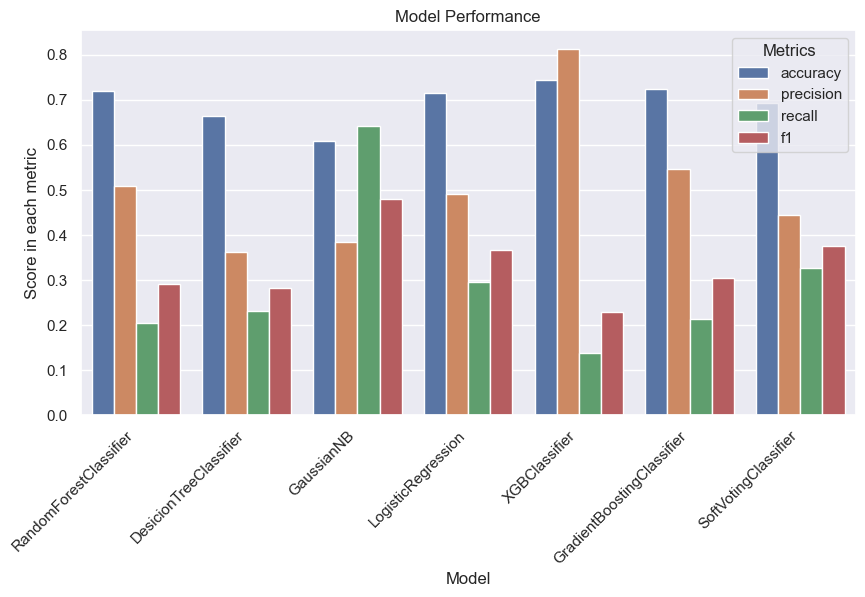

In [ ]:
create_visualization(s)

We are supposed to use the test set only on the final model.

#### XAI

In final presentation I would leave only the PDP plots that show any dependence. You can try using LIME, it has nicer visualisation in my personal opinion but it is just a suggestion.

I definitely agree that you could try LIME, looks very nice

Notebook is missing comments/short summaries for certain parts of your analysis, which is why it is chaotic and hard to understand sometimes. I believe that everything will be clear and organised in the final presentation. Nice that you created a function generating table with the results for certain models. 

I agree with everything Karolina wrote. Also maybe I missed sth but have you tried AutoML? Maybe it's worth considering. I'm very curious what will you show on final presentation